### Number of unique sets of polarization constants for molecules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
mol = "CO2"
mol_path = f'../{mol}'

In [3]:
df_param_ex = pd.read_csv(f'{mol_path}/exact_param_{mol}.csv')
df_param_ex

,a10p,a11p,a12p,a10l,a11l,a12l,a20p,a21p,a22p,a20l,a21l,a22l
0,3.976905e+15,1.974125e+15,9.393587e+14,-2.958818e+15,-3.637073e+13,-1.731239e+13,3.976931e+15,1.974176e+15,9.393828e+14,-2.958818e+15,-3.637164e+13,-1.731282e+13
1,3.807941e+14,-7.423135e+13,-3.529251e+13,-5.009480e+14,-1.543910e+14,-7.345998e+13,3.807942e+14,-7.423115e+13,-3.529242e+13,-5.009478e+14,-1.543906e+14,-7.345977e+13
2,-7.646333e+12,7.589643e+10,3.607864e+10,6.910752e+12,-1.475932e+12,-7.022523e+11,-7.646336e+12,7.589098e+10,3.607605e+10,6.910795e+12,-1.475850e+12,-7.022129e+11
3,-4.836019e+14,-3.732297e+14,-1.776179e+14,2.253609e+14,-1.183394e+14,-5.631120e+13,-4.836016e+14,-3.732292e+14,-1.776176e+14,2.253610e+14,-1.183393e+14,-5.631112e+13
4,-1.460813e+15,4.300932e+15,2.046747e+15,4.443706e+15,1.377545e+15,6.557550e+14,-1.460946e+15,4.300677e+15,2.046625e+15,4.443662e+15,1.377463e+15,6.557159e+14
...,...,...,...,...,...,...,...,...,...,...,...,...
4858,1.912754e+15,-1.542994e+14,-7.340635e+13,-1.877446e+15,2.215067e+14,1.053872e+14,1.912758e+15,-1.542924e+14,-7.340303e+13,-1.877450e+15,2.214976e+14,1.053829e+14
4859,7.461159e+12,5.303109e+13,2.522907e+13,1.562781e+13,-9.085231e+12,-4.318233e+12,7.461165e+12,5.303111e+13,2.522908e+13,1.562782e+13,-9.085216e+12,-4.318226e+12
4860,3.198545e+14,-1.023237e+14,-4.870125e+13,-3.538681e+14,3.757085e+13,1.788318e+13,3.198540e+14,-1.023247e+14,-4.870171e+13,-3.538680e+14,3.757113e+13,1.788332e+13
4861,9.679911e+14,-3.897513e+13,-1.846236e+13,-1.336349e+15,-6.621900e+14,-3.152026e+14,9.679911e+14,-3.897514e+13,-1.846237e+13,-1.336349e+15,-6.621897e+14,-3.152025e+14


21
5966.302804637935
441
59.48513880661661
861
12.689440918670954
1281
3.929886361751168
1701
1.419143756216441
0.9865075644441403
1861


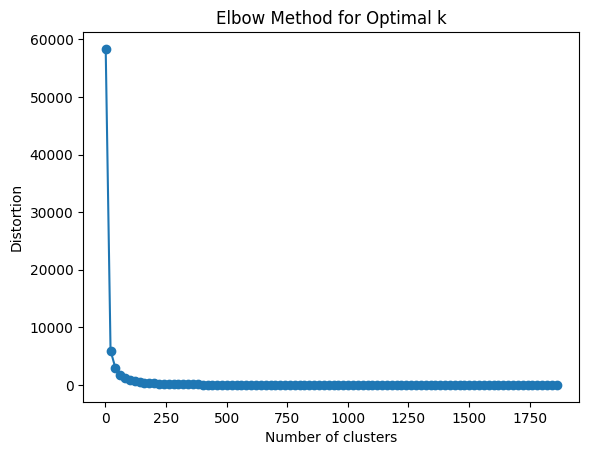

In [4]:
# Similarity of sets (Correlation) For CO2

# ex_data = df_param_ex
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_param_ex)

# distortions = []
# k_range = []  # You can adjust the range based on your specific dataset
# k = 1
# while True:
# # for k in k_range:
#     kmeans = KMeans(n_clusters=k, n_init="auto")
#     kmeans.fit(df_scaled)
#     dist = kmeans.inertia_
#     distortions.append(dist)
#     k_range.append(k)
#     # print(k)
#     if k % 21 == 0:
#         print(k)
#         print(dist)
#     elif dist < 1:
#         print(dist)
#         print(k)
#         break
#     k += 20

distortions = []
k_range = range(1, 51, 5)  # Adjust the range as needed

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init="auto")
    kmeans.fit(df_scaled)
    dist = kmeans.inertia_
    distortions.append(dist)

    # Print progress updates
    print(f"Evaluating model with {k} clusters...")

# Plot the elbow
plt.plot(k_range, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()
# plt.savefig(f'../images/{mol}_polar_compare.png')

In [ ]:
# Initialize the KMeans model
kmeans = KMeans(n_clusters=592, random_state=0, n_init="auto")  # You may need to adjust the number of clusters based on your data

# Fit the model to the data
kmeans.fit(df_scaled)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)
# Find the representative sets of values that are closest to the cluster centers
representative_sets = []
for center in cluster_centers:
    distances = np.linalg.norm(df_scaled - center, axis=1)
    closest_points = df_scaled[distances < threshold]
    unique_closest_points = np.unique(closest_points, axis=0)
    representative_sets.append(unique_closest_points)

len(representative_sets)
# Now representative_sets contains the different/unique sets of values that are representative for all the data